<a href="https://colab.research.google.com/github/aditya-raikar14/Fundamental/blob/main/Handwritten_digit_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hand Written Digit PredictionClassification Analysis

In [45]:
import pandas as pd


In [46]:
import numpy as np

In [47]:
import matplotlib.pyplot as plt


Import Data

In [48]:
from sklearn.datasets import load_digits

In [49]:
df = load_digits()

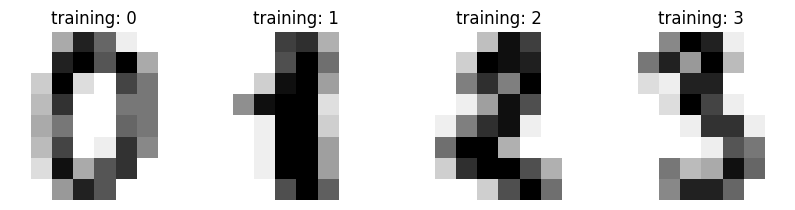

In [50]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("training: %i" % label)


In [51]:
df.images.shape

(1797, 8, 8)

In [52]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [53]:
df.images[0].shape

(8, 8)

In [16]:
len(df.images)

1797

In [54]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [55]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [56]:
data[0].shape

(64,)

In [57]:
data.shape

(1797, 64)

Scaling Image Data

In [58]:
data.min()

0.0

In [59]:
data.max()

16.0

In [60]:
data = data/16

In [61]:
data.min()

0.0

In [62]:
data.max()

1.0

In [63]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

Train Test Split Data

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [66]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

Random Forest Model

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf = RandomForestClassifier()

In [72]:
rf.fit(X_train, y_train)

RandomForestClassifier()

Predict Test Data

In [73]:
y_pred = rf.predict(X_test)

In [74]:
y_pred

array([6, 3, 6, 4, 8, 8, 1, 4, 6, 7, 2, 7, 4, 7, 9, 3, 8, 8, 5, 5, 1, 1,
       9, 3, 2, 2, 3, 5, 9, 8, 7, 4, 5, 2, 7, 6, 0, 9, 4, 5, 4, 7, 8, 6,
       9, 8, 3, 5, 8, 3, 5, 7, 3, 8, 2, 1, 2, 5, 4, 5, 6, 1, 0, 9, 1, 7,
       6, 5, 2, 9, 5, 4, 7, 3, 3, 5, 1, 3, 4, 8, 7, 8, 5, 3, 2, 4, 3, 3,
       3, 3, 9, 0, 7, 7, 2, 8, 9, 4, 0, 1, 0, 6, 1, 9, 8, 9, 1, 2, 9, 6,
       3, 6, 2, 9, 2, 6, 4, 2, 3, 4, 0, 7, 4, 6, 7, 2, 2, 3, 7, 0, 7, 1,
       0, 9, 5, 5, 7, 3, 9, 1, 6, 0, 5, 4, 7, 5, 9, 2, 7, 8, 4, 3, 1, 7,
       5, 0, 7, 1, 1, 9, 4, 1, 7, 9, 0, 4, 3, 8, 5, 6, 4, 3, 7, 3, 3, 7,
       5, 3, 1, 0, 7, 0, 5, 0, 6, 8, 5, 4, 8, 4, 3, 3, 3, 6, 1, 4, 9, 1,
       9, 1, 4, 1, 6, 3, 5, 3, 2, 2, 9, 9, 0, 7, 4, 8, 9, 2, 9, 5, 8, 4,
       0, 4, 3, 3, 8, 5, 6, 5, 2, 9, 3, 7, 5, 5, 5, 9, 1, 2, 7, 1, 3, 0,
       0, 6, 8, 6, 5, 3, 3, 3, 7, 9, 1, 1, 7, 8, 5, 5, 1, 6, 1, 0, 2, 9,
       5, 1, 1, 0, 4, 7, 0, 8, 5, 8, 4, 9, 3, 7, 6, 9, 1, 8, 7, 1, 2, 4,
       2, 6, 4, 8, 1, 6, 9, 0, 1, 0, 8, 3, 8, 9, 1,

Model Accuracy

In [75]:
from sklearn.metrics import confusion_matrix, classification_report

In [76]:
confusion_matrix(y_test, y_pred)

array([[51,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 48,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 63,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 48,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0, 53,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  0,  0, 50,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 58,  1,  0],
       [ 0,  1,  1,  0,  1,  2,  0,  0, 47,  0],
       [ 0,  0,  0,  2,  0,  2,  0,  0,  0, 53]])

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.95      1.00      0.97        52
           2       0.98      1.00      0.99        48
           3       0.95      0.98      0.97        64
           4       0.96      0.96      0.96        50
           5       0.93      0.96      0.95        55
           6       1.00      0.98      0.99        51
           7       0.98      0.98      0.98        59
           8       0.96      0.90      0.93        52
           9       1.00      0.93      0.96        57

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



**Explanation**
Handwritten digit prediction involves classifying images of handwritten digits (0-9) into their respective categories. Here's a brief overview:

1. **Problem:** Classify images of digits into one of ten categories.
2. **Data:** Use datasets like MNIST with labeled images (60,000 training, 10,000 test).
3. **Preprocessing:** Normalize and reshape images for the model.
4. **Model Selection:** Choose from models like Logistic Regression, SVM, or CNNs (Convolutional Neural Networks), with CNNs often being the most effective.
5. **Training:** Train the model using the training dataset with optimization techniques to minimize errors.
6. **Evaluation:** Assess the model’s performance on the test set using metrics like accuracy and confusion matrix.
7. **Fine-Tuning:** Adjust the model based on performance to improve accuracy.
8. **Deployment:** Implement the model in applications for digit recognition tasks.

This process helps create a system that can accurately recognize and classify handwritten digits.